In [16]:
import numpy as np
import matplotlib.pyplot as plt
from lib.algorithms import *

In [17]:
def create_circle(size, radius, center=None):
    if center is None:
        center = (size // 2, size // 2)
    Y, X = np.ogrid[:size, :size]
    distance = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    circle = (distance <= radius).astype(np.float64)
    return circle

def create_square(size, square_size, top_left=None):
    square = np.zeros((size, size), dtype=np.float64)
    if top_left is None:
        start = size // 2 - square_size // 2
    else:
        start = top_left[0]
    square[start:start+square_size, start:start+square_size] = 1.0
    return square

In [18]:
size = 128
image_shape = (size, size)
sigma = 1.0  # Gaussian kernel std for heat kernel approximation

In [19]:
# Shapes
circle_img = create_circle(size, radius=30)
square_img = create_square(size, square_size=50)
triangle_img = np.tri(size, size, k=size//4).astype(np.float64)  # a simple triangular pattern

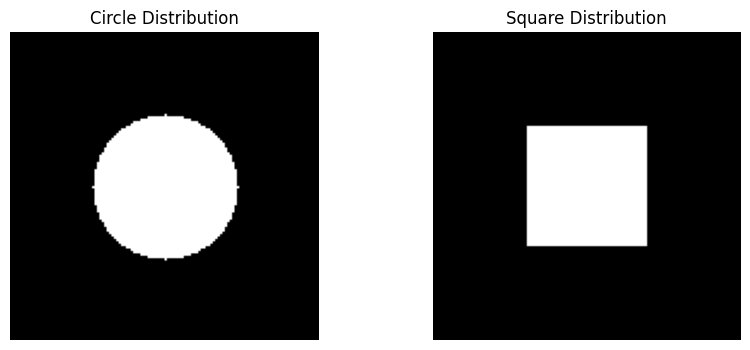

Maximum iterations reached without full convergence.
Approximate Regularized Wasserstein Distance (squared): 1.5894119643186607e-05


In [20]:
# Normalize images to get probability distributions

mu0 = circle_img / np.sum(circle_img)
mu1 = square_img / np.sum(square_img)

# Visualize the distributions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mu0, cmap='gray')
plt.title("Circle Distribution")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mu1, cmap='gray')
plt.title("Square Distribution")
plt.axis("off")
plt.show()

# Flatten the distributions for processing
mu0_flat = mu0.flatten()
mu1_flat = mu1.flatten()

# Set parameters for the kernel and regularization.
sigma = 2.0    # Controls the diffusion in the heat kernel approximation.
gamma = 0.1    # Regularization parameter.

# Run the Sinkhorn iterations
v, w, a = sinkhorn(mu0_flat, mu1_flat, image_shape, sigma, tol=1e-6, max_iter=1000)

# Compute the approximate regularized Wasserstein distance
W2_squared = compute_convolutional_distance(mu0_flat, mu1_flat, v, w, a, gamma)
print("Approximate Regularized Wasserstein Distance (squared):", W2_squared)

Iteration 1: barycenter L1 change = 2.62e+04
Iteration 2: barycenter L1 change = 1.93e+03
Iteration 3: barycenter L1 change = 9.07e+02
Iteration 4: barycenter L1 change = 2.32e+03
Iteration 5: barycenter L1 change = 1.08e+02
Iteration 6: barycenter L1 change = 1.26e+01
Iteration 7: barycenter L1 change = 3.75e+00
Iteration 8: barycenter L1 change = 1.84e+00
Iteration 9: barycenter L1 change = 8.67e-01
Iteration 10: barycenter L1 change = 5.65e-01
Iteration 11: barycenter L1 change = 2.96e-01
Iteration 12: barycenter L1 change = 2.85e-01
Iteration 13: barycenter L1 change = 1.61e-01
Iteration 14: barycenter L1 change = 1.17e-01
Iteration 15: barycenter L1 change = 7.88e-02
Iteration 16: barycenter L1 change = 5.62e-02
Iteration 17: barycenter L1 change = 4.14e-02
Iteration 18: barycenter L1 change = 3.09e-02
Iteration 19: barycenter L1 change = 2.31e-02
Iteration 20: barycenter L1 change = 1.72e-02
Iteration 21: barycenter L1 change = 1.27e-02
Iteration 22: barycenter L1 change = 9.31e-

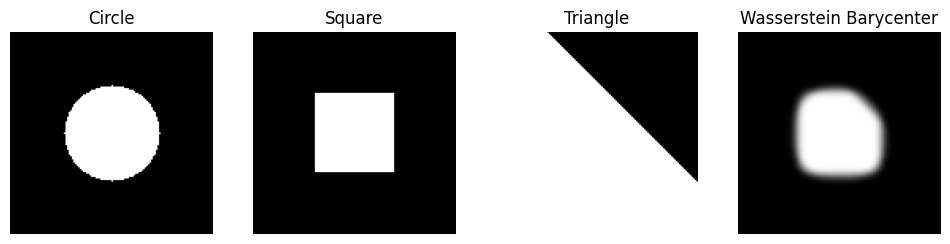

In [21]:
# Normalize each image so they sum to 1
def normalize(img):
    return img / np.sum(img)

mu0 = normalize(circle_img).flatten()
mu1 = normalize(square_img).flatten()
mu2 = normalize(triangle_img).flatten()

# Choose barycenter weights, e.g., equal weights.
alpha_list = [1/3, 1/3, 1/3]
mu_list = [mu0, mu1, mu2]

# Compute the barycenter
mu_bar, v_list, w_list = wasserstein_barycenter(mu_list, alpha_list, image_shape, sigma, tol=1e-6, max_iter=200)

# Reshape for visualization
mu_bar_img = mu_bar.reshape(image_shape)
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(circle_img, cmap='gray')
plt.title("Circle")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(square_img, cmap='gray')
plt.title("Square")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(triangle_img, cmap='gray')
plt.title("Triangle")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(mu_bar_img, cmap='gray')
plt.title("Wasserstein Barycenter")
plt.axis("off")

plt.show()


Computing displacement interpolation for t = 0.00
Iteration 1: barycenter L1 change = 2.60e+04
Iteration 2: barycenter L1 change = 2.43e-12
Barycenter converged.

Computing displacement interpolation for t = 0.20
Iteration 1: barycenter L1 change = 2.62e+04
Iteration 2: barycenter L1 change = 5.17e+02
Iteration 3: barycenter L1 change = 1.31e+02
Iteration 4: barycenter L1 change = 5.89e+02
Iteration 5: barycenter L1 change = 1.18e+00
Iteration 6: barycenter L1 change = 2.22e-03
Iteration 7: barycenter L1 change = 1.50e-04
Iteration 8: barycenter L1 change = 2.81e-05
Iteration 9: barycenter L1 change = 5.82e-06
Iteration 10: barycenter L1 change = 1.17e-06
Iteration 11: barycenter L1 change = 2.36e-07
Barycenter converged.

Computing displacement interpolation for t = 0.40
Iteration 1: barycenter L1 change = 2.63e+04
Iteration 2: barycenter L1 change = 6.22e+02
Iteration 3: barycenter L1 change = 1.75e+02
Iteration 4: barycenter L1 change = 7.83e+02
Iteration 5: barycenter L1 change = 

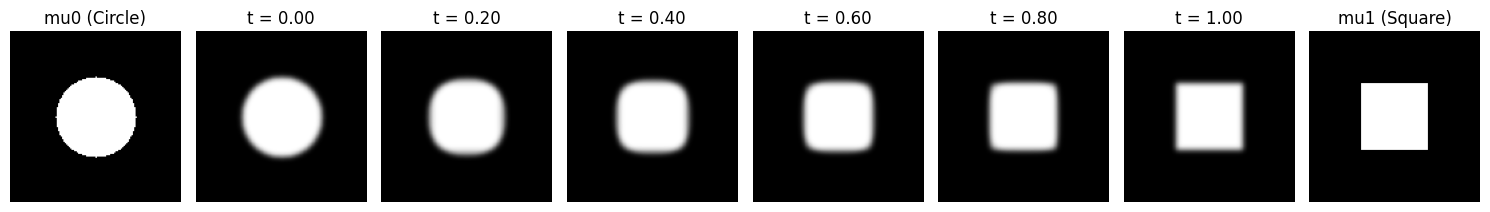

In [22]:
mu0 = normalize(circle_img).flatten()
mu1 = normalize(square_img).flatten()

# Define a set of t values for the interpolation.
t_values = np.linspace(0, 1, 6)  # e.g., 0, 0.2, 0.4, 0.6, 0.8, 1
mu_t_list = []

for t in t_values:
    print(f"\nComputing displacement interpolation for t = {t:.2f}")
    mu_t = displacement_interpolation(mu0, mu1, t, image_shape, sigma, tol=1e-6, max_iter=200, verbose=True)
    mu_t_list.append(mu_t.reshape(image_shape))

# Plot the original distributions and the interpolated ones.
plt.figure(figsize=(15, 4))

plt.subplot(1, len(t_values) + 2, 1)
plt.imshow(mu0.reshape(image_shape), cmap='gray')
plt.title("mu0 (Circle)")
plt.axis("off")

plt.subplot(1, len(t_values) + 2, len(t_values) + 2)
plt.imshow(mu1.reshape(image_shape), cmap='gray')
plt.title("mu1 (Square)")
plt.axis("off")

for idx, (t, mu_t_img) in enumerate(zip(t_values, mu_t_list), start=2):
    plt.subplot(1, len(t_values) + 2, idx)
    plt.imshow(mu_t_img, cmap='gray')
    plt.title(f"t = {t:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Iteration 1: Average L1 change on unknown vertices = 2.51e+04
Iteration 2: Average L1 change on unknown vertices = 4.83e+03
Iteration 3: Average L1 change on unknown vertices = 7.03e+02
Iteration 4: Average L1 change on unknown vertices = 1.88e+02
Iteration 5: Average L1 change on unknown vertices = 1.67e+03
Iteration 6: Average L1 change on unknown vertices = 6.32e+02
Iteration 7: Average L1 change on unknown vertices = 4.51e+02
Iteration 8: Average L1 change on unknown vertices = 3.58e+02
Iteration 9: Average L1 change on unknown vertices = 2.99e+02
Iteration 10: Average L1 change on unknown vertices = 2.59e+02
Iteration 11: Average L1 change on unknown vertices = 2.31e+02
Iteration 12: Average L1 change on unknown vertices = 2.08e+02
Iteration 13: Average L1 change on unknown vertices = 1.91e+02
Iteration 14: Average L1 change on unknown vertices = 1.76e+02
Iteration 15: Average L1 change on unknown vertices = 1.64e+02
Iteration 16: Average L1 change on unknown vertices = 1.54e+02
I

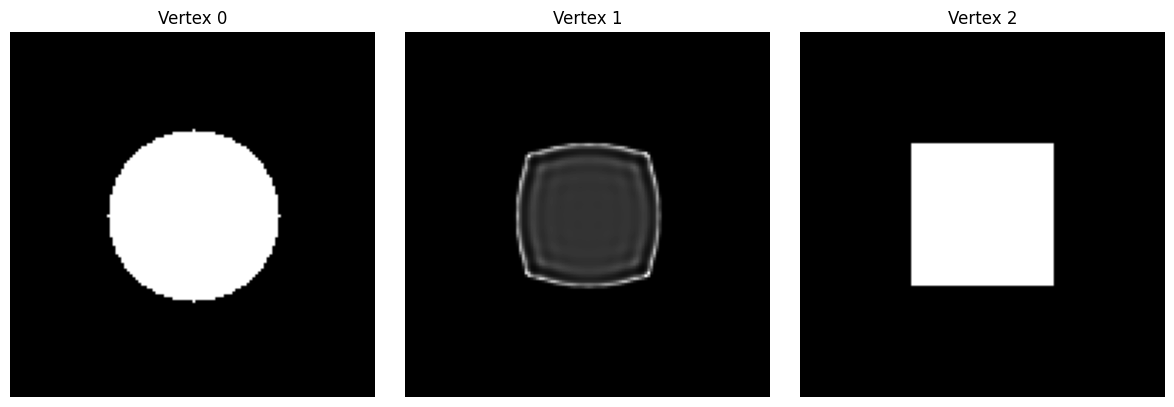

In [23]:
# For demonstration, we use a simple graph with 3 vertices.
# Let vertices 0 and 2 be fixed with given distributions and vertex 1 be unknown.
vertices = [0, 1, 2]
# Define edges: (0, 1) and (1, 2) with weight 1.
edges = [(0, 1, 1.0), (1, 2, 1.0)]
circle_img = create_circle(size, radius=30)
square_img = create_square(size, square_size=50)

mu_fixed = {
    0: normalize(circle_img).flatten(),
    2: normalize(square_img).flatten()
}

fixed = [0, 2]

# Run the Wasserstein propagation.
mu = wasserstein_propagation(vertices, edges, fixed, mu_fixed, image_shape, sigma, tol=1e-6, max_iter=100, verbose=True)

# Visualize the propagated distributions.
plt.figure(figsize=(12,4))
for v in vertices:
    plt.subplot(1, len(vertices), v+1)
    plt.imshow(mu[v].reshape(image_shape), cmap='gray')
    plt.title(f"Vertex {v}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Iteration 1: Average L1 change on unknown vertices = 2.51e+04
Iteration 2: Average L1 change on unknown vertices = 4.83e+03
Iteration 3: Average L1 change on unknown vertices = 7.37e+02
Iteration 4: Average L1 change on unknown vertices = 2.60e+04
Iteration 5: Average L1 change on unknown vertices = 3.78e+02
Iteration 6: Average L1 change on unknown vertices = 4.71e-11
Soft maps propagation converged.


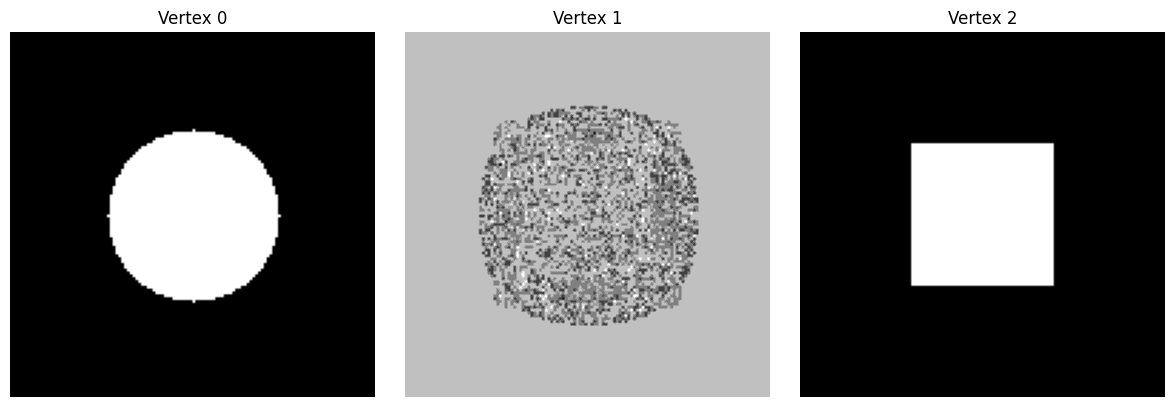

In [24]:
# Define a simple source graph.
# Suppose we have 3 vertices in the source (M0). Vertices 0 and 2 are fixed (with given soft correspondences),
# and vertex 1 is unknown.
vertices = [0, 1, 2]
# Edges: (0, 1) and (1, 2) with weight 1.
edges = [(0, 1, 1.0), (1, 2, 1.0)]

# Define the fixed distributions for vertices 0 and 2.
mu_fixed = {
    0: normalize(circle_img).flatten(),
    2: normalize(square_img).flatten()
}

fixed = [0, 2]

# For each vertex in the source graph, we also define a compatibility function.
# Here we simply create a synthetic compatibility vector. For example, for vertex 0 we may want target pixels near the center to be more compatible,
# while for vertex 2 the compatibility may favor pixels near the boundary.
# In practice, these would be derived from geometric descriptors.
def create_compatibility(size, mode='center'):
    Y, X = np.indices((size, size))
    if mode == 'center':
        cx, cy = size/2, size/2
        comp = np.sqrt((X - cx)**2 + (Y - cy)**2)
    elif mode == 'edge':
        comp = np.maximum(X, Y)
    else:
        comp = np.ones((size, size))
    # Normalize the compatibility so that smaller values indicate higher compatibility.
    comp = comp - comp.min()
    comp = comp / (comp.max() + 1e-16)
    return comp.flatten()

compatibility = {
    0: create_compatibility(size, mode='center'),
    1: create_compatibility(size, mode='uniform'),  # for unknown vertex, use uniform compatibility
    2: create_compatibility(size, mode='edge')
}

# Set parameters for the soft maps penalty.
tau = 0.5
gamma = 0.1

# Run the soft maps propagation.
mu_soft = soft_maps_propagation(vertices, edges, fixed, mu_fixed, 
                                compatibility, tau, gamma, image_shape, sigma, 
                                tol=1e-6, max_iter=100, verbose=True)

# Visualize the soft maps: distributions on the target domain for each source vertex.
plt.figure(figsize=(12,4))
for v in vertices:
    plt.subplot(1, len(vertices), v+1)
    plt.imshow(mu_soft[v].reshape(image_shape), cmap='gray')
    plt.title(f"Vertex {v}")
    plt.axis("off")
plt.tight_layout()
plt.show()